# Classification and Regression Trees
Decision trees are supervised learning models used for problems involving classification and regression. Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions.
<br><br>
- Classification-And-Regression-Tree or CART
- Bias-Variance Tradeoff
- Bagging and Random Forests
- Boosting
- Model Tuning
<br><br>
- Decision trees produce rectangular decision regions in space
- Trees do not require feature scaling (ex. Standardization)
- Trees are able to capture non-linear relationships between features and labels
- Decision Region: region in the feature space where all instances are assigned one class label.
- Decision Boundry: surface separating different decision regions.

#### How to Import Decision Tree Classifier, Instantiate, Use
```
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Spliting the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, stratify= y, random_state= 1)

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Fit dt to training set
dt.fit(X_train, y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)

# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)
```

In [1]:
import pandas as pd

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Importing LabelBinarizer
from sklearn.preprocessing import LabelBinarizer


# Gathering the dataset
data = pd.read_csv('../_datasets/wbc.csv')

# We want X to be radius_mean and concave points_mean
X = data[['radius_mean', 'concave points_mean']].values

# We need to transform the target for y.
# Where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor.

# create a LabelBinarizer object to encode the target column
lb = LabelBinarizer()

# fit the LabelBinarizer on the tumor_type column
lb.fit(data['diagnosis'])

# transform the tumor_type column to binary values (0 or 1) for the y target
data['is_malignant'] = lb.transform(data['diagnosis'])

# Create y target
y = data['is_malignant'].values


In [2]:
# Spliting the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, stratify= y, random_state= 1)

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to training set
dt.fit(X_train, y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)

# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)

0.8859649122807017

In [3]:
# Looking at the first 5 labels

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


## Logistic Regression vs Classification Tree
A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

# Creating function to plot the two models
def plot_labeled_decision_regions(X, y, models):
    resolution = 0.02
    
    X = pd.DataFrame(X, columns=['feature1', 'feature2'])
    y = pd.Series(y)
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    for i, model in enumerate(models):
        Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        
        ax[i].contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(colors[:len(np.unique(y))]))
        
        for idx, cl in enumerate(np.unique(y)):
            ax[i].scatter(x=X.iloc[y.values == cl, 0],
                          y=X.iloc[y.values == cl, 1],
                          alpha=0.8, c=[ListedColormap(colors)(idx)],
                          marker=markers[idx], label=cl)
    
    plt.show()



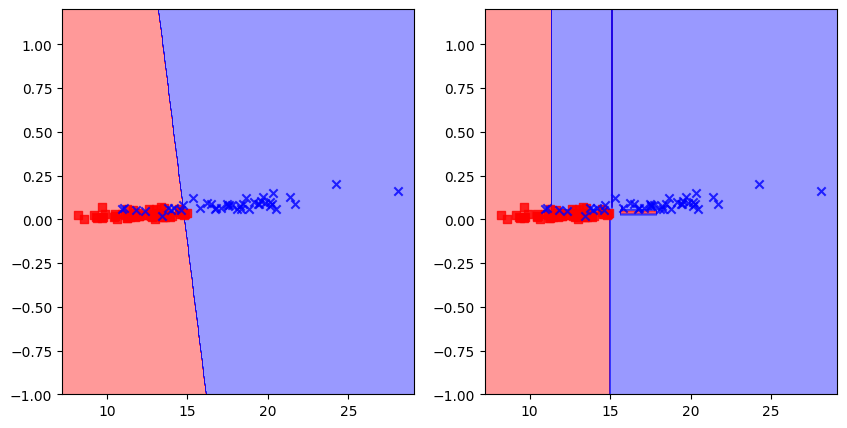

In [5]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(pd.DataFrame(X_test, columns=['feature1', 'feature2']), y_test, clfs)


Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

**Decision Tree**: A decision-tree is a data-structure consisting of a hierarchy of individual units called nodes.  

**Node**: A node is a point that involves either a question or a prediction.  

**Root**: The root is the node at which the decision-tree starts growing. It has no parent node and involves a question that gives rise to 2 children nodes through two branches.  

**Internal Node**: An internal node is a node that has a parent. It also involves a question that gives rise to 2 children nodes.  

**Leaf**: A node that has no children is called a leaf. A leaf has one parent node and involves no questions. It's where a prediction is made. The tree is trained in such a way so that, in each leaf, one class-label is predominant.  

In [6]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [7]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Use dt_entropy to predict test set labels
y_pred_gini= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.886
Accuracy achieved by using entropy: 0.921


Notice how the two models achieve almost the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

## Decision Tree for Regression
Training a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.  

The dataset is to be split as 80% train and 20% test.  

The stratify parameter in train_test_split() is used for classification tasks when you want to ensure that the proportion of classes is the same in both the training and test sets. Since the target column 'mpg' is a continuous variable and not a class, you should not use the stratify parameter.  

In [8]:
import pandas as pd

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split


# Load df
mpg_df = pd.read_csv('../_datasets/auto.csv')

# Create dummy variables and concatenate them to the original DataFrame
dummies = pd.get_dummies(mpg_df['origin'], prefix='origin')
mpg_df = pd.concat([mpg_df, dummies], axis=1)

# Drop the original 'origin' column
mpg_df = mpg_df.drop('origin', axis=1)

# Getting the values
X = mpg_df.iloc[:,1:].values
y = mpg_df['mpg'].values

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)




DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [9]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.27


## Linear Regression vs Regression Tree

In [10]:
from sklearn.linear_model import LinearRegression
# NOTE Lower RSME is better

# Creating lr
lr = LinearRegression()

# Fit dt to the training set
lr.fit(X_train, y_train)

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_dt
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_dt
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.98
Regression Tree test set RMSE: 4.27


## The Bias-Variance Tradeoff
Diagnosing the bias and variance problems of a regression tree.

In [11]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

Since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

In [12]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.  

Now we will evaluate the training error.

In [13]:
# MSE_model = mean_squared_error(y_true, y_predicted)
# RMSE_model = mean_squared_error(y_true, y_predicted)**(1/2)

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (mean_squared_error(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))


Train RMSE: 5.15


Notice how the training error is roughly equal to the 10-folds CV error.  
<br><br>

#### Does dt suffer from a high bias or a high variance problem?  
```
print(RMSE_train, RMSE_CV, baseline_RMSE)
5.15 5.14 5.1
```
dt suffers from high bias because RMSE_CV ≈ RMSE_train and both scores are greater than baseline_RMSE.
dt is underfitting the training set, as the model is too constrained to capture the nonlinear dependencies between features and labels.
<br><br>
<br><br>

#### Advantages of CARTS
- Simple to understand
- Simple to interpret
- Easy to use
- Flexibility: the ability to describe non-linear dependencies
- Preprocessing: no need to standardize or normalize features

#### Limitations of CARTS
- Classification: can only produce orthogonal decision boundries
- Sensitive to small variations in the training set
- High variance: unconstrained CARTs may overfit the training set

Solution: Ensemble Learning
